## importing necessary libraries

In [118]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,auc
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics



## Importing data set 

In [2]:
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
data1 = data.copy()

In [4]:
data1.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
data1.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
data1.shape

(2111, 17)

In [7]:
data1.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [9]:
## changing columns names
data1 = data1.rename(columns={'family_history_with_overweight': 'FHWO',
                           'NObeyesdad' : 'BMI',})
print(data1.head())

   Gender   Age  Height  Weight FHWO FAVC  FCVC  NCP       CAEC SMOKE  CH2O  \
0  Female  21.0    1.62    64.0  yes   no   2.0  3.0  Sometimes    no   2.0   
1  Female  21.0    1.52    56.0  yes   no   3.0  3.0  Sometimes   yes   3.0   
2    Male  23.0    1.80    77.0  yes   no   2.0  3.0  Sometimes    no   2.0   
3    Male  27.0    1.80    87.0   no   no   3.0  3.0  Sometimes    no   2.0   
4    Male  22.0    1.78    89.8   no   no   2.0  1.0  Sometimes    no   2.0   

   SCC  FAF  TUE        CALC                 MTRANS                  BMI  
0   no  0.0  1.0          no  Public_Transportation        Normal_Weight  
1  yes  3.0  0.0   Sometimes  Public_Transportation        Normal_Weight  
2   no  2.0  1.0  Frequently  Public_Transportation        Normal_Weight  
3   no  2.0  0.0  Frequently                Walking   Overweight_Level_I  
4   no  0.0  0.0   Sometimes  Public_Transportation  Overweight_Level_II  


In [10]:
## need to check weather dataset having duplicates r not 
duplicated = data1[data1.duplicated(keep='first')]
print(duplicated.shape)## as in the data set there are 24 duplicated better to remove that duplicats , it doednt effect to model

(24, 17)


In [11]:
data1.shape

(2111, 17)

In [12]:
data1.drop_duplicates(keep='first',inplace=True)
print(data1.shape)

(2087, 17)


## Checking Null values

In [13]:
data1.isnull().sum() ## since there are no null values 

Gender    0
Age       0
Height    0
Weight    0
FHWO      0
FAVC      0
FCVC      0
NCP       0
CAEC      0
SMOKE     0
CH2O      0
SCC       0
FAF       0
TUE       0
CALC      0
MTRANS    0
BMI       0
dtype: int64

## Performing Stastical Analysis 

In [14]:
data1.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [15]:
data1.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'FHWO', 'FAVC', 'FCVC', 'NCP',
       'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'BMI'],
      dtype='object')

## Performing Exploratory Data Analysis

In [16]:
data1_categorical = data1.select_dtypes(include='object')
print(data1_categorical.head())
print(data1_categorical.shape)

   Gender FHWO FAVC       CAEC SMOKE  SCC        CALC                 MTRANS  \
0  Female  yes   no  Sometimes    no   no          no  Public_Transportation   
1  Female  yes   no  Sometimes   yes  yes   Sometimes  Public_Transportation   
2    Male  yes   no  Sometimes    no   no  Frequently  Public_Transportation   
3    Male   no   no  Sometimes    no   no  Frequently                Walking   
4    Male   no   no  Sometimes    no   no   Sometimes  Public_Transportation   

                   BMI  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II  
(2087, 9)


In [17]:
data1_continous = data1.select_dtypes(include=["int64","float64"])
data1_continous
data1_continous.shape

(2087, 8)

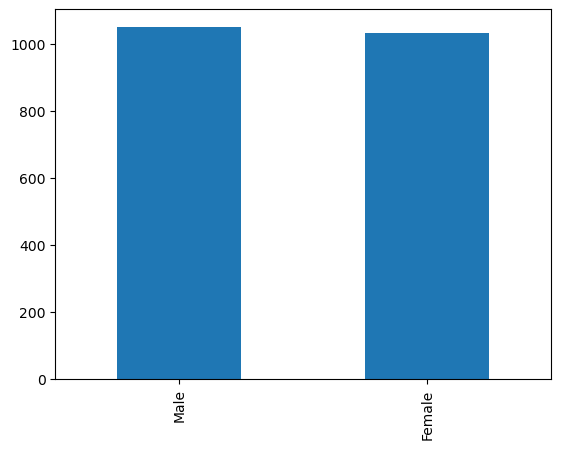

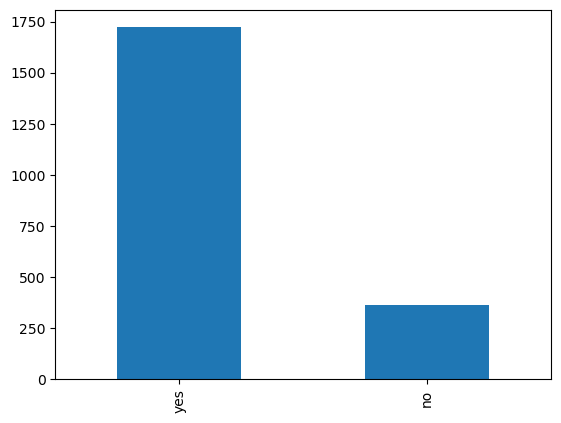

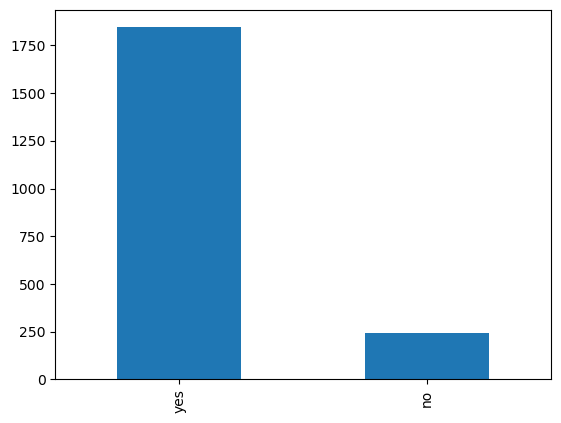

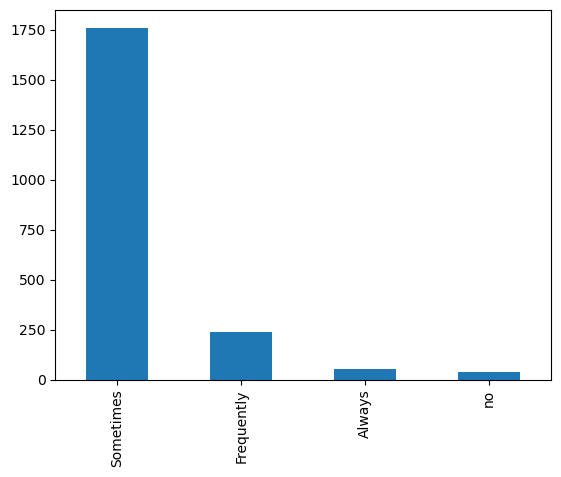

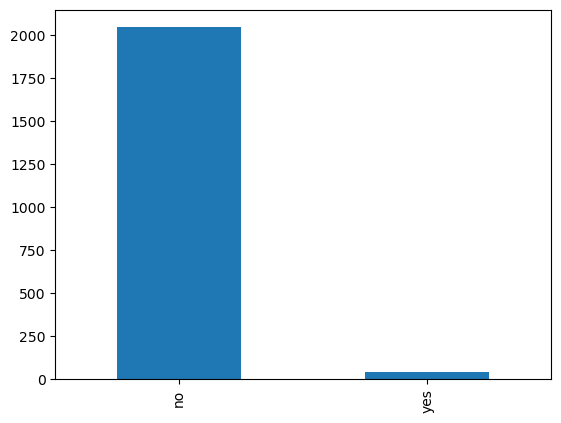

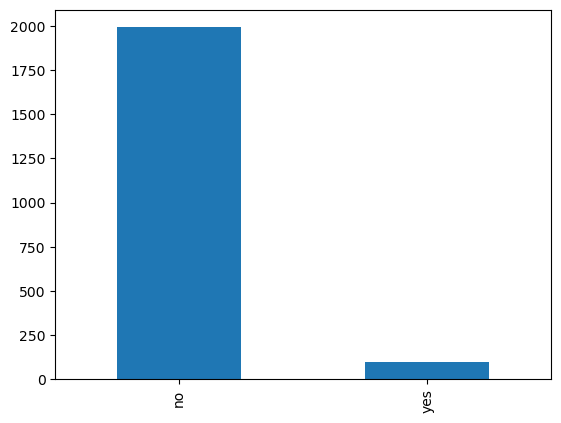

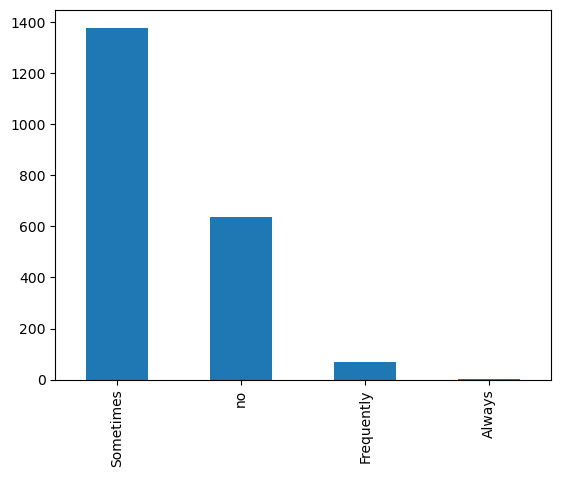

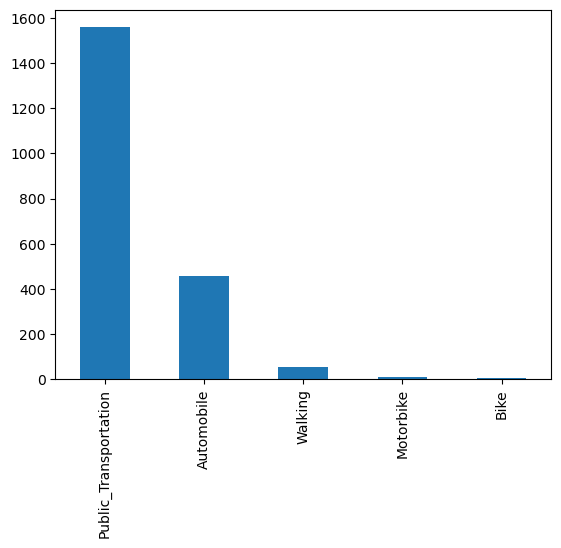

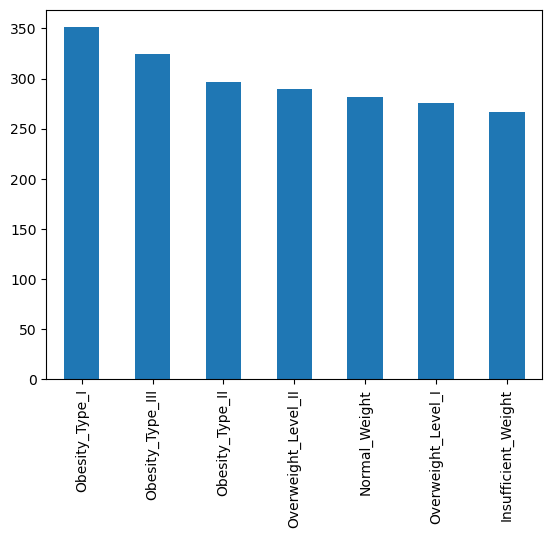

In [18]:
def discrete(data):
    for i in data.columns:
        data[i].value_counts().plot(kind='bar')
        plt.show()

discrete(data1_categorical)

In [19]:
def continous_hist(data):
    for i in data.columns:
        sns.histplot(data[i])
        plt.show()

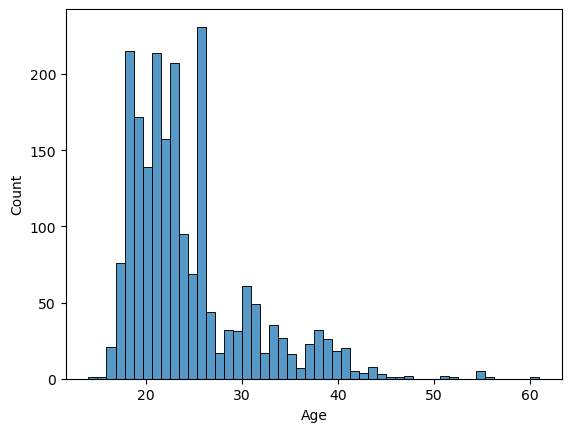

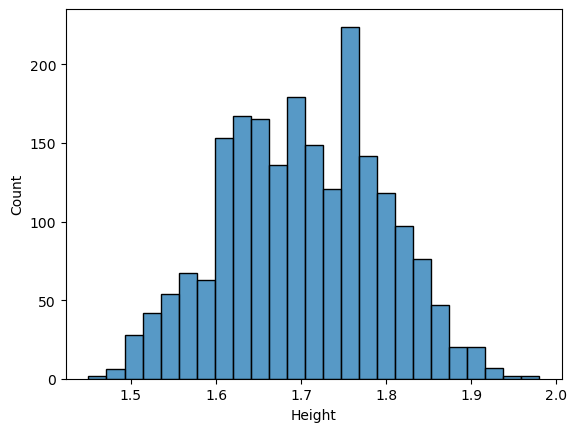

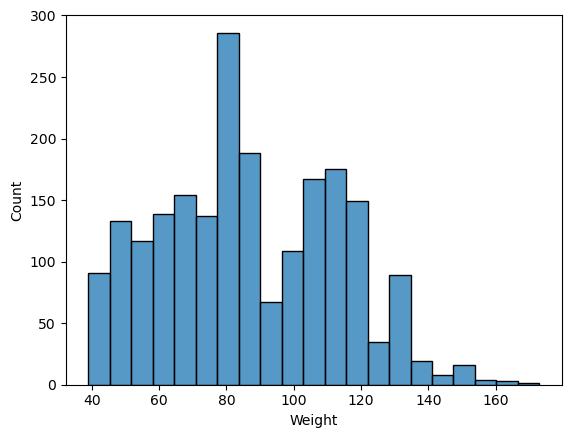

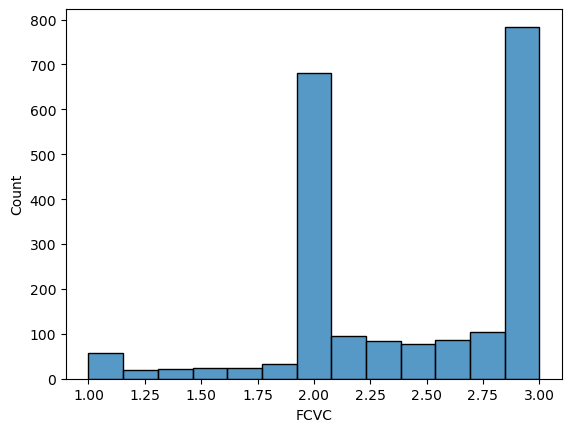

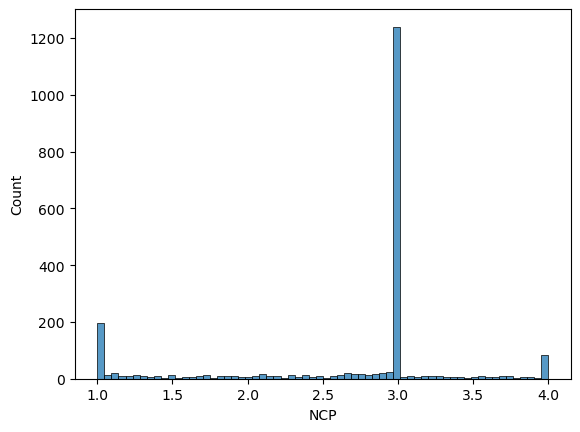

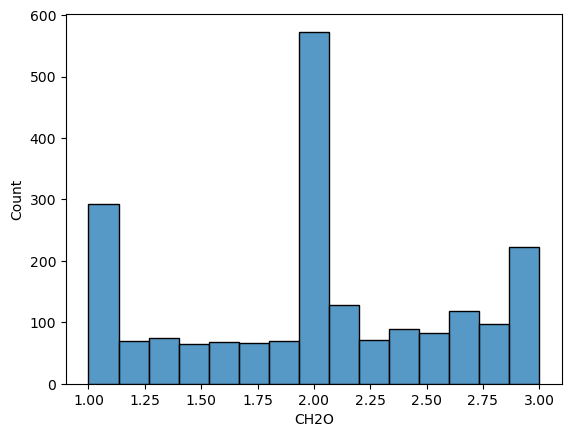

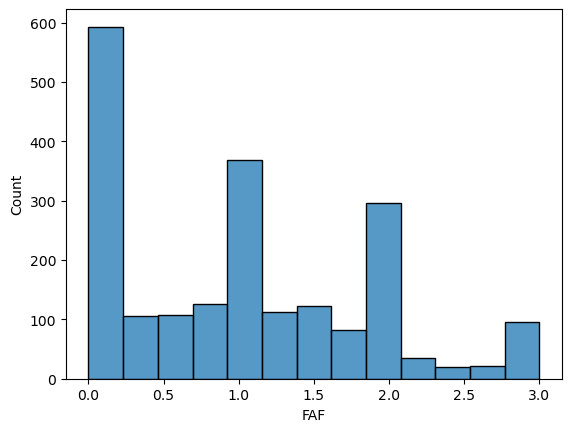

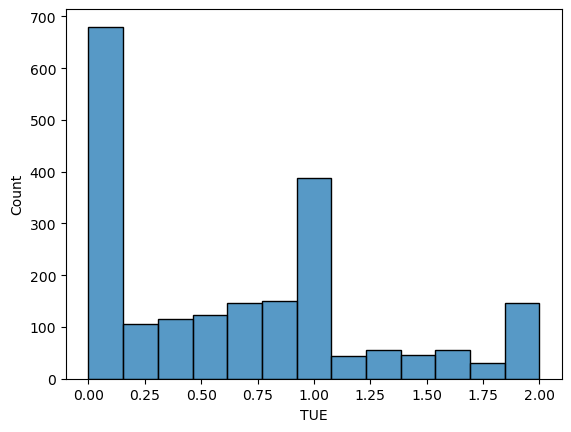

In [20]:
continous_hist(data1_continous)

In [21]:
def continous_boxplot(data):
    for i in data.columns:
        sns.boxplot(data[i])
        plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


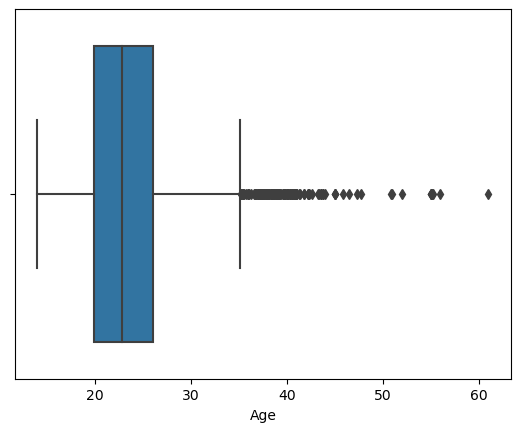

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


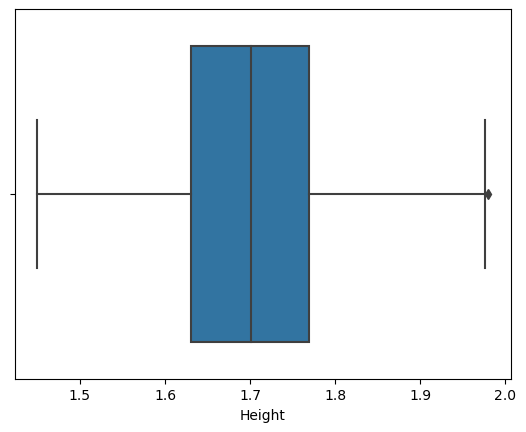

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


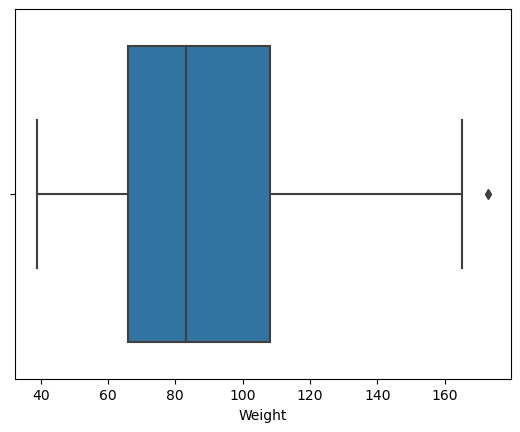

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


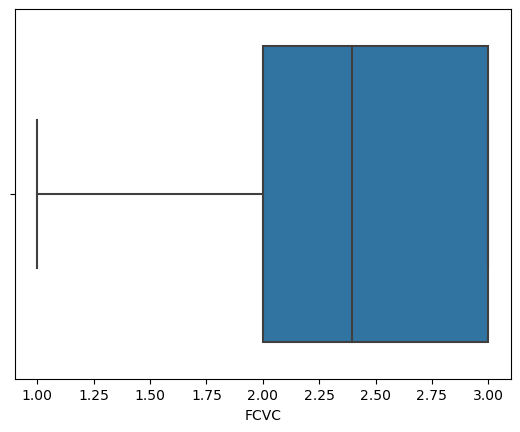

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


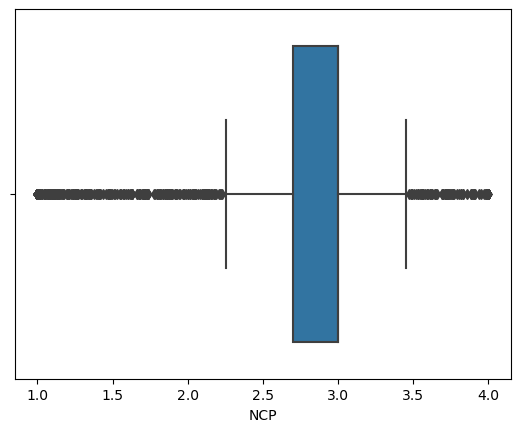

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


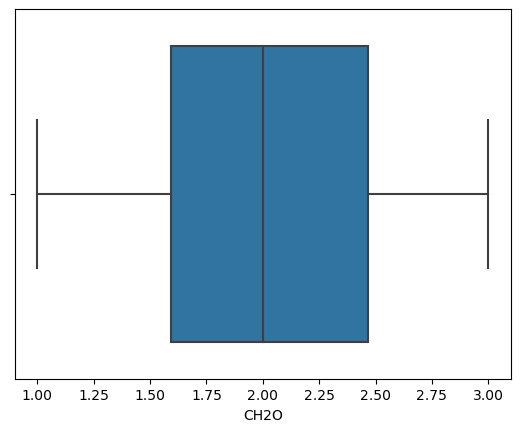

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


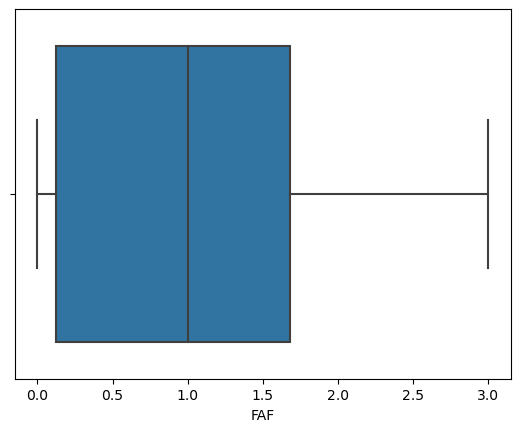

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


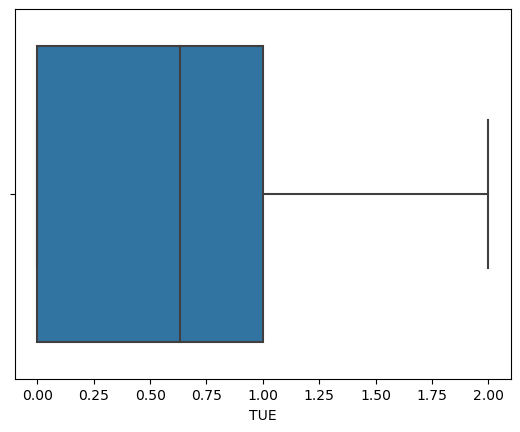

In [22]:
continous_boxplot(data1_continous)

In [23]:
def distplot(data):
    for i in data.columns:
        sns.distplot(data[i])
        plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


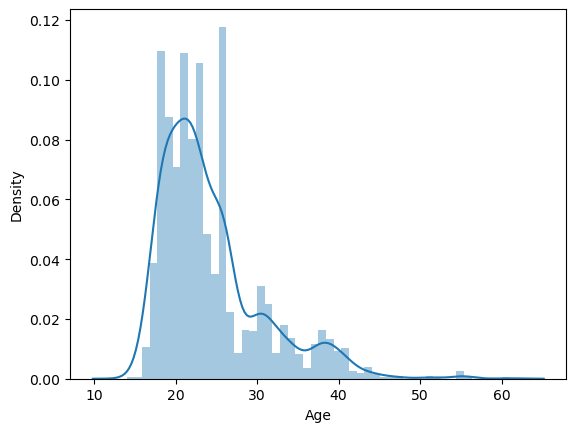

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


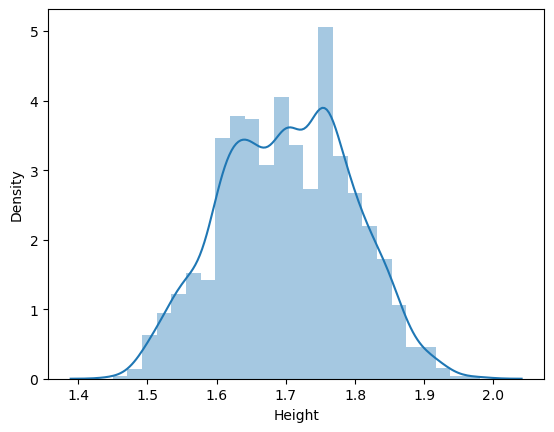

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


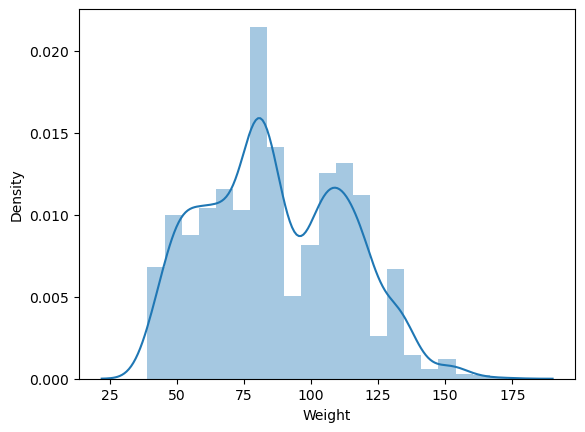

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


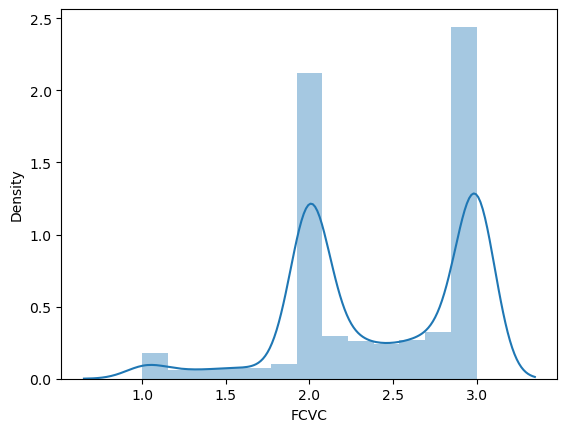

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


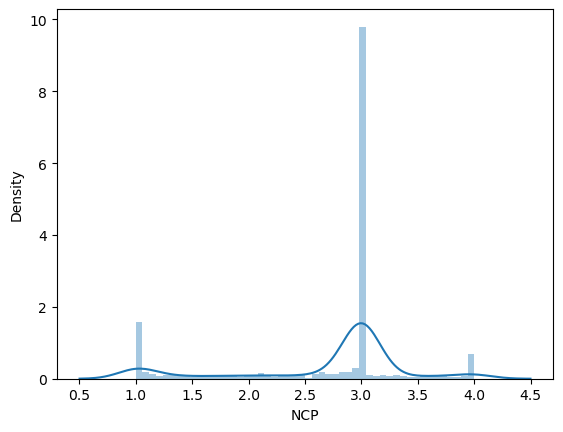

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


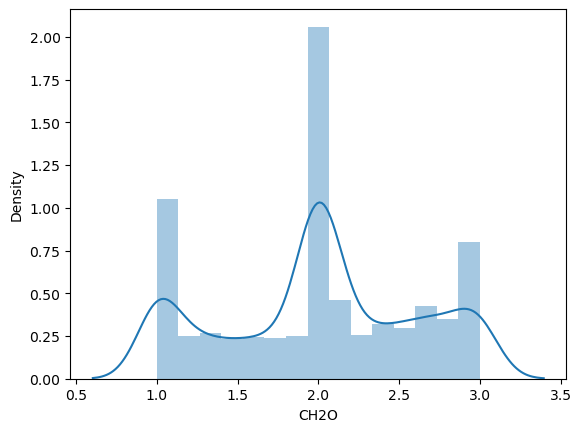

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


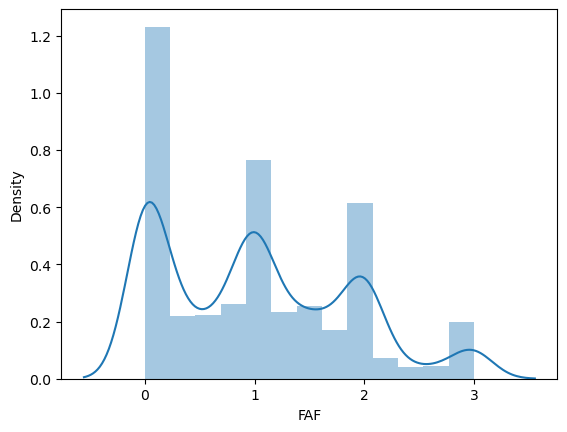

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


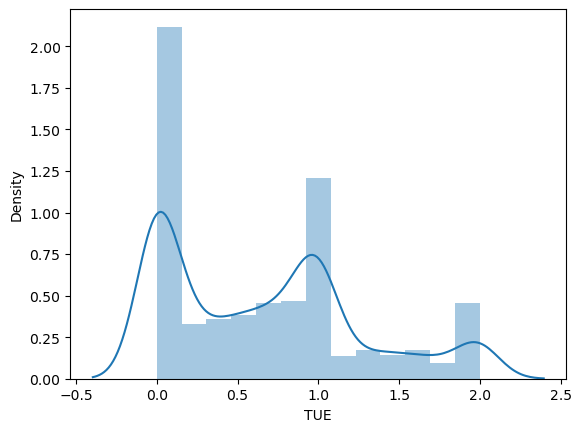

In [24]:
distplot(data1_continous)

## Data cleaning

In [25]:
## detecting outliers  for age 
def outlires(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3-q1
    upper_limit = q3+1.5*iqr
    lower_limit = q1-1.5*iqr
    print(lower_limit,upper_limit)

    
    

In [26]:
outlires(data1['Age'])

10.789843749999996 35.12609375


In [27]:
outlires(data['Weight'])

2.537334499999993 170.3666905


In [28]:
outlires(data['Height'])

1.4223039999999996 1.9761600000000001


## as age has a lot of outliers so checking age with dependent variable


In [29]:
categorical_dependent = data1.BMI.value_counts()

<AxesSubplot:xlabel='BMI', ylabel='Age'>

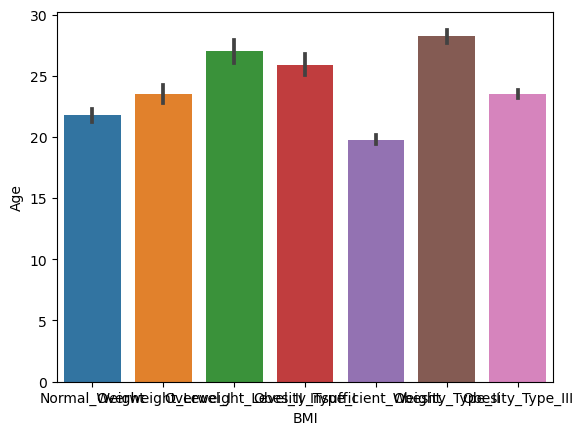

In [30]:
figsize = (50,80)
sns.barplot(x = data1['BMI'],y =data1['Age'])

In [31]:
age_35=  data1[data1['Age']>35.12609375] 

In [32]:
age_35

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
13,Male,41.000000,1.800000,99.000000,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,2.000000,1.00000,Frequently,Automobile,Obesity_Type_I
21,Female,52.000000,1.690000,87.000000,yes,yes,3.000000,1.000000,Sometimes,yes,2.000000,no,0.000000,0.00000,no,Automobile,Obesity_Type_I
33,Male,39.000000,1.790000,90.000000,no,no,2.000000,1.000000,Sometimes,no,2.000000,no,0.000000,0.00000,Sometimes,Public_Transportation,Overweight_Level_II
92,Male,55.000000,1.780000,84.000000,yes,no,3.000000,4.000000,Frequently,no,3.000000,yes,3.000000,0.00000,Frequently,Walking,Overweight_Level_I
104,Female,38.000000,1.560000,80.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.00000,Sometimes,Automobile,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,Male,37.765356,1.763582,117.861590,yes,yes,2.145114,2.888193,Sometimes,no,2.038128,no,0.852344,0.00000,Sometimes,Automobile,Obesity_Type_II
1775,Male,37.207082,1.762921,118.401740,yes,yes,2.136830,2.993084,Sometimes,no,1.885926,no,0.615298,0.00000,Sometimes,Automobile,Obesity_Type_II
1776,Male,38.108940,1.752863,119.201465,yes,yes,2.499388,2.989791,Sometimes,no,1.959777,no,0.608100,0.64676,Sometimes,Automobile,Obesity_Type_II
1777,Male,38.644441,1.768235,117.792268,yes,yes,2.230742,2.920373,Sometimes,no,1.831187,no,0.756277,0.00000,Sometimes,Automobile,Obesity_Type_II


In [33]:
age_35.BMI.unique()

array(['Obesity_Type_I', 'Overweight_Level_II', 'Overweight_Level_I',
       'Normal_Weight', 'Obesity_Type_II', 'Insufficient_Weight'],
      dtype=object)

In [34]:
data1.BMI.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

## Removing outliers for age

In [35]:
data1[(data1.Age<10.789843749999996)|(data1.Age>35.12609375)]


,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
13,Male,41.000000,1.800000,99.000000,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,2.000000,1.00000,Frequently,Automobile,Obesity_Type_I
21,Female,52.000000,1.690000,87.000000,yes,yes,3.000000,1.000000,Sometimes,yes,2.000000,no,0.000000,0.00000,no,Automobile,Obesity_Type_I
33,Male,39.000000,1.790000,90.000000,no,no,2.000000,1.000000,Sometimes,no,2.000000,no,0.000000,0.00000,Sometimes,Public_Transportation,Overweight_Level_II
92,Male,55.000000,1.780000,84.000000,yes,no,3.000000,4.000000,Frequently,no,3.000000,yes,3.000000,0.00000,Frequently,Walking,Overweight_Level_I
104,Female,38.000000,1.560000,80.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.00000,Sometimes,Automobile,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,Male,37.765356,1.763582,117.861590,yes,yes,2.145114,2.888193,Sometimes,no,2.038128,no,0.852344,0.00000,Sometimes,Automobile,Obesity_Type_II
1775,Male,37.207082,1.762921,118.401740,yes,yes,2.136830,2.993084,Sometimes,no,1.885926,no,0.615298,0.00000,Sometimes,Automobile,Obesity_Type_II
1776,Male,38.108940,1.752863,119.201465,yes,yes,2.499388,2.989791,Sometimes,no,1.959777,no,0.608100,0.64676,Sometimes,Automobile,Obesity_Type_II
1777,Male,38.644441,1.768235,117.792268,yes,yes,2.230742,2.920373,Sometimes,no,1.831187,no,0.756277,0.00000,Sometimes,Automobile,Obesity_Type_II


In [36]:
data1 = data1[(data1.Age>10.789843749999996)&(data1.Age<35.12609375)]
data1

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


<AxesSubplot:>

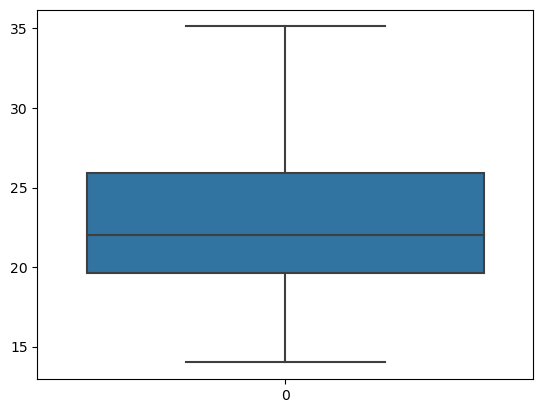

In [37]:
sns.boxplot(data=[data1['Age']])

In [38]:
data1[(data1.Weight<2.537334499999993)|(data1.Weight>170.3666905)]


,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
344,Male,18.0,1.87,173.0,yes,yes,3.0,3.0,Frequently,no,2.0,no,2.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III


In [39]:
data1 = data1[(data1.Weight>2.537334499999993)&(data1.Weight<170.3666905)]
data1

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [40]:
data1[(data1.Height<1.422303999999999)|(data1.Height>1.9761600000000001)]


,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
349,Male,20.0,1.98,125.0,yes,yes,2.0,3.0,Always,no,3.0,no,1.0,1.0,Sometimes,Public_Transportation,Obesity_Type_I


In [41]:
data1 = data1[(data1.Height>1.422303999999999)&(data1.Height<1.9761600000000001)]
data1

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## Converting object into numerical 

In [42]:
data1.shape

(1918, 17)

## converting columns into array cos TypeError: fit_transform() missing 1 required positional argument: 'y'

In [43]:
le = LabelEncoder()
def label_encode(data):
    data = le.fit_transform(data)
    return data 

In [44]:
data1['Gender'] = label_encode(data1['Gender'])

C:\Users\HP\AppData\Local\Temp\ipykernel_5920\1390525650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Gender'] = label_encode(data1['Gender'])


In [45]:
data1

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,0,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,0,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,1,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,1,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,1,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,0,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,0,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,0,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [46]:
label_encode(data1['SMOKE'])

array([0, 1, 0, ..., 0, 0, 0])

In [47]:
data1.head()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,0,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,0,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [48]:
data1['FHWO'] = label_encode(data1['FHWO'])

C:\Users\HP\AppData\Local\Temp\ipykernel_5920\794805419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['FHWO'] = label_encode(data1['FHWO'])


In [49]:
data1.head()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,0,21.0,1.62,64.0,1,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,0,21.0,1.52,56.0,1,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,23.0,1.80,77.0,1,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,27.0,1.80,87.0,0,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,22.0,1.78,89.8,0,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [50]:
data1['FAVC'] = label_encode(data1['FAVC'])

C:\Users\HP\AppData\Local\Temp\ipykernel_5920\3147378922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['FAVC'] = label_encode(data1['FAVC'])


In [51]:
data1.head()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,0,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [52]:
data1['SMOKE'] = label_encode(data1['SMOKE'])

C:\Users\HP\AppData\Local\Temp\ipykernel_5920\2122557655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['SMOKE'] = label_encode(data1['SMOKE'])


In [53]:
data1['SCC'] = label_encode(data1['SCC'])

C:\Users\HP\AppData\Local\Temp\ipykernel_5920\3877438973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['SCC'] = label_encode(data1['SCC'])


In [54]:
data1.head()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,0,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [55]:
data1.CAEC.unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [56]:
data1.CALC.unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [57]:
data1.MTRANS.unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [58]:
data1.BMI.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [59]:
data1['BMI'] = label_encode(data1['BMI'])

C:\Users\HP\AppData\Local\Temp\ipykernel_5920\3323923770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['BMI'] = label_encode(data1['BMI'])


In [60]:
data1['CAEC'] = label_encode(data1['CAEC'])

C:\Users\HP\AppData\Local\Temp\ipykernel_5920\2192810560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['CAEC'] = label_encode(data1['CAEC'])


In [61]:
data1['CALC'] = label_encode(data1['CALC'])

C:\Users\HP\AppData\Local\Temp\ipykernel_5920\1080608266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['CALC'] = label_encode(data1['CALC'])


In [62]:
data1['MTRANS'] = label_encode(data1['MTRANS'])

C:\Users\HP\AppData\Local\Temp\ipykernel_5920\2287681712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['MTRANS'] = label_encode(data1['MTRANS'])


In [63]:
data1.head()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


<AxesSubplot:>

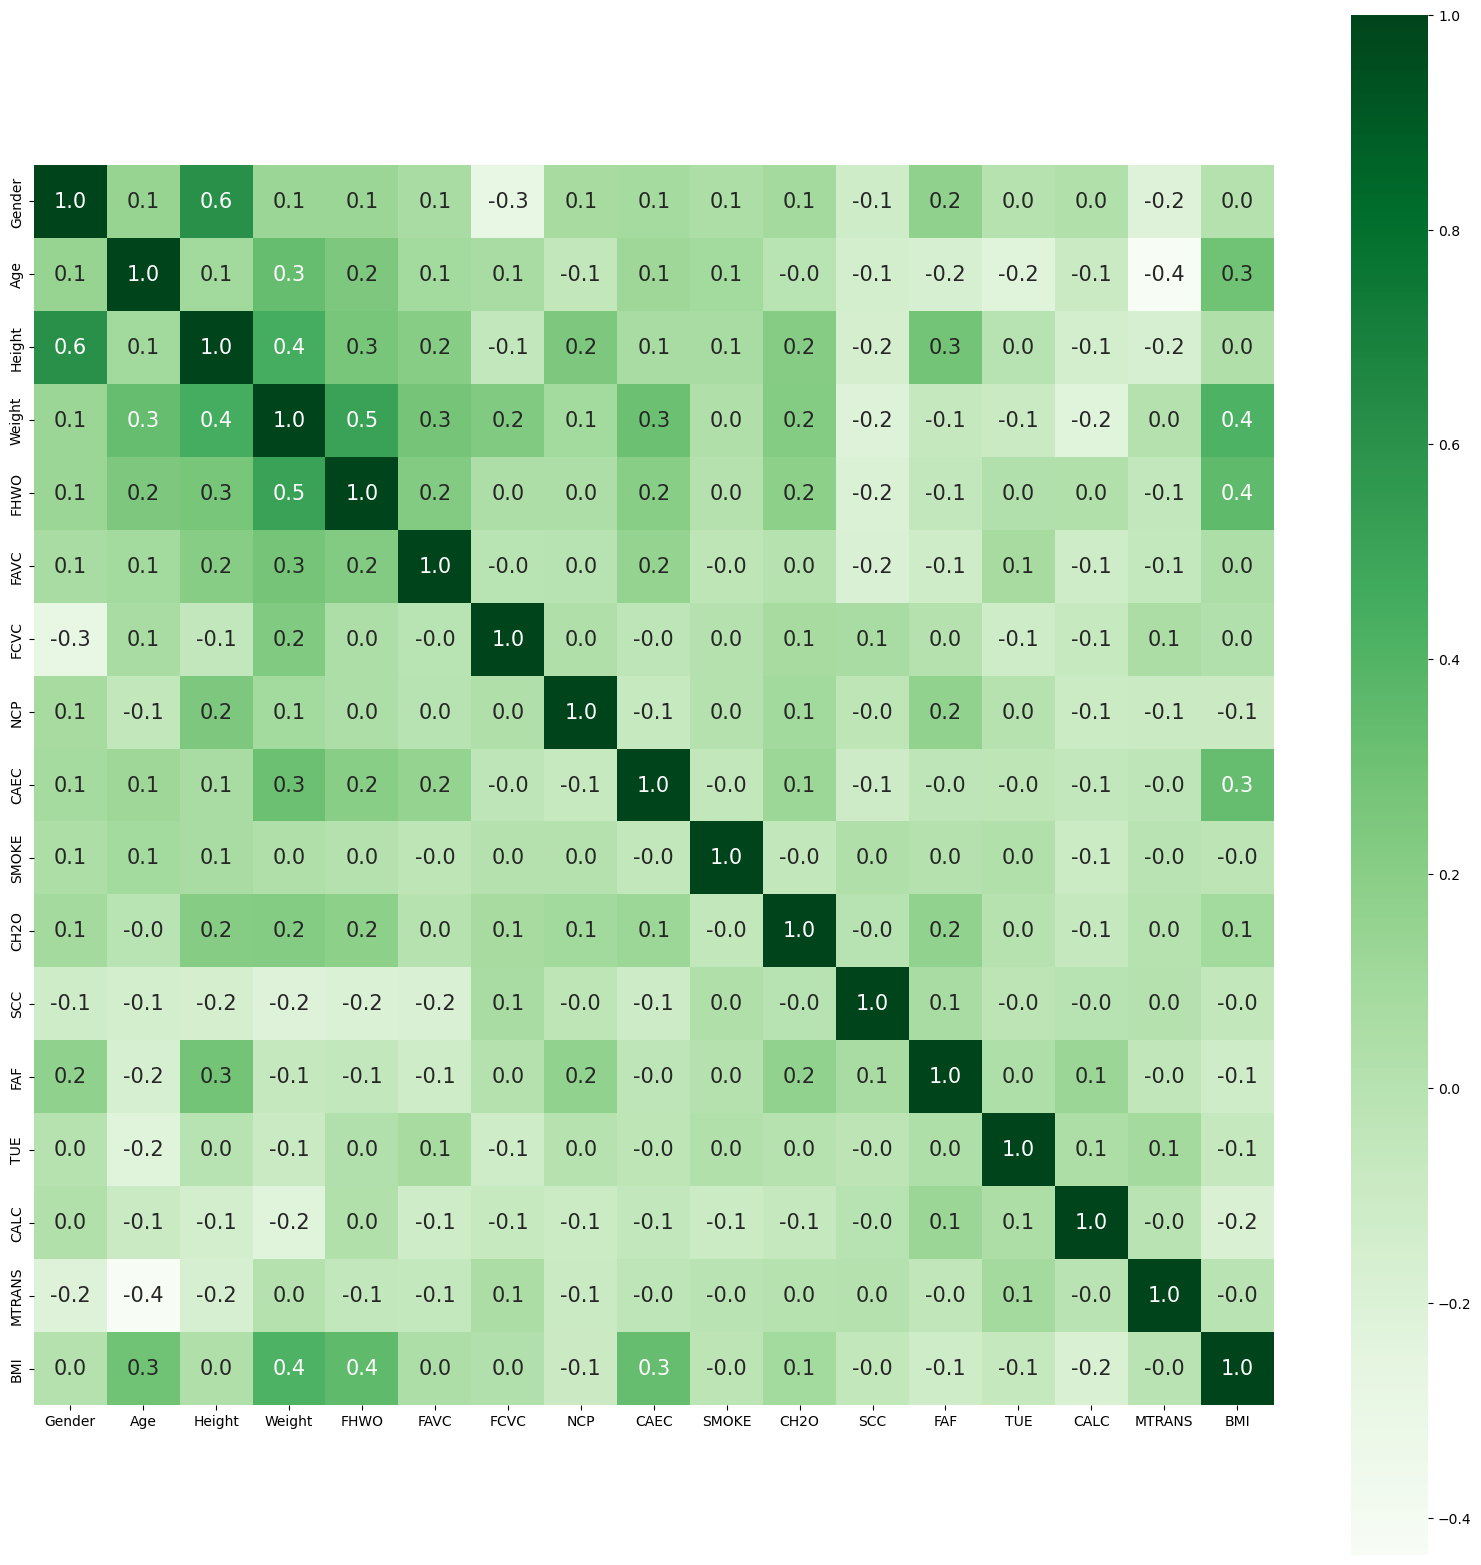

In [64]:
plt.figure(figsize=(20,20))

sns.heatmap(data1.corr(),cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [65]:
data1.corr()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
Gender,1.000000,0.144677,0.610189,0.131280,0.127738,0.070619,-0.288175,0.080489,0.084232,0.051822,0.086931,-0.111978,0.175120,0.007927,0.025651,-0.208920,0.016770
Age,0.144677,1.000000,0.101522,0.329674,0.244648,0.092328,0.072194,-0.051714,0.119413,0.092560,-0.004442,-0.143257,-0.167340,-0.222150,-0.088624,-0.434646,0.294453
Height,0.610189,0.101522,1.000000,0.448220,0.269249,0.204538,-0.057361,0.243505,0.071297,0.069407,0.213840,-0.154071,0.288142,0.002005,-0.146281,-0.167784,0.031560
Weight,0.131280,0.329674,0.448220,1.000000,0.509291,0.280714,0.230405,0.096330,0.312806,0.035590,0.218196,-0.208456,-0.070005,-0.085602,-0.221845,0.011337,0.416237
FHWO,0.127738,0.244648,0.269249,0.509291,1.000000,0.223600,0.044623,0.042225,0.204085,0.011046,0.186573,-0.198076,-0.058280,0.023068,0.025008,-0.054970,0.355312
FAVC,0.070619,0.092328,0.204538,0.280714,0.223600,1.000000,-0.008086,0.000863,0.153946,-0.027551,0.007009,-0.186695,-0.111293,0.078582,-0.110544,-0.064332,0.042101
FCVC,-0.288175,0.072194,-0.057361,0.230405,0.044623,-0.008086,1.000000,0.032970,-0.034592,0.013830,0.076271,0.065748,0.011157,-0.125439,-0.071028,0.053860,0.024179
NCP,0.080489,-0.051714,0.243505,0.096330,0.042225,0.000863,0.032970,1.000000,-0.071460,0.015951,0.099011,-0.029397,0.160367,0.004937,-0.098970,-0.086874,-0.095783
CAEC,0.084232,0.119413,0.071297,0.312806,0.204085,0.153946,-0.034592,-0.071460,1.000000,-0.049094,0.123294,-0.108896,-0.033825,-0.027714,-0.053945,-0.034774,0.332380
SMOKE,0.051822,0.092560,0.069407,0.035590,0.011046,-0.027551,0.013830,0.015951,-0.049094,1.000000,-0.049583,0.035739,0.018594,0.029353,-0.098698,-0.014228,-0.024765


### Splitting the data 

In [66]:
X = data1.drop(['BMI'],axis=1)

In [67]:
X

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3


In [68]:
 y = data1['BMI']

In [69]:
y

0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: BMI, Length: 1918, dtype: int32

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42, test_size=0.20)

In [71]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1534, 16) (384, 16) (1534,) (384,)


In [144]:
def metric(x,y):
        print(confusion_matrix(x,y))
        print(accuracy_score(x,y))
        print(precision_score(x,y,average='macro'))
        print(recall_score(x,y,average='micro'))
        print(metrics.multilabel_confusion_matrix(x,y))
        
    

## Standardzing the data

In [85]:
sc = StandardScaler()
def standardizing(data):
    X_train_standarzing = sc.fit_transform(data)
    return X_train_standarzing 
    

In [87]:
X_train_standard = standardizing(X_train)

In [88]:
X_train_standard

array([[-1.01444592, -0.69120122, -0.93857462, ..., -1.15999535,
        -0.52674259,  0.4051892 ],
       [-1.01444592,  1.64860703, -0.93857462, ..., -1.15999535,
        -0.52674259, -2.31697242],
       [-1.01444592,  0.69147407, -0.67237139, ...,  0.48674324,
        -0.52674259,  0.4051892 ],
       ...,
       [-1.01444592, -0.26660722, -1.02898952, ..., -0.71368967,
        -0.52674259,  0.4051892 ],
       [ 0.98575979,  2.18446056,  0.55348134, ...,  1.04536967,
        -0.52674259, -2.31697242],
       [-1.01444592,  0.01074125, -1.0400675 , ..., -1.15999535,
         1.43925044,  0.4051892 ]])

In [89]:
def standardizing_test(data):
    X_test_standarzing = sc.transform(data)
    return X_test_standarzing 

In [90]:
X_test_standard = standardizing_test(X_test)

In [91]:
X_test_standard

array([[-1.01444592, -0.93661342, -0.92698807, ...,  0.48674324,
        -0.52674259,  0.4051892 ],
       [ 0.98575979,  1.76418093,  0.56746701, ...,  0.63658822,
        -0.52674259, -2.31697242],
       [-1.01444592, -0.92518205, -1.60671399, ..., -0.69157562,
         1.43925044,  0.4051892 ],
       ...,
       [-1.01444592,  0.71268373, -0.78440051, ..., -0.91016864,
        -0.52674259,  0.4051892 ],
       [ 0.98575979,  1.51729466,  0.72119888, ...,  1.48237457,
        -0.52674259, -2.31697242],
       [-1.01444592, -1.15916287, -0.00774778, ...,  1.3522641 ,
        -0.52674259,  0.4051892 ]])

In [92]:
le = LogisticRegression()
X_train_standard_logistic = le.fit(X_train_standard,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [95]:
 X_test_standard_logistic_test =  X_train_standard_logistic.predict(X_test_standard)

In [127]:
metric(X_test_standard_logistic_test,y_test)

[[58  7  0  0  0  0  0]
 [ 3 41  0  0  0  4  3]
 [ 0  0 37  4  0  0  4]
 [ 0  0  4 58  0  0  0]
 [ 0  0  0  0 59  0  1]
 [ 0  3  0  0  0 37  6]
 [ 0  2  4  0  0  6 43]]
0.8671875
0.8605329540638518
0.8671875
[[[316   3]
  [  7  58]]

 [[321  12]
  [ 10  41]]

 [[331   8]
  [  8  37]]

 [[318   4]
  [  4  58]]

 [[324   0]
  [  1  59]]

 [[328  10]
  [  9  37]]

 [[315  14]
  [ 12  43]]]


In [129]:
dt = DecisionTreeClassifier()


In [121]:
min_max = MinMaxScaler()
X_train_min_max = min_max.fit_transform(X_train)

In [122]:
X_train_min_max

array([[0.        , 0.20914594, 0.32340111, ..., 0.        , 0.66666667,
        0.75      ],
       [0.        , 0.7320108 , 0.32340111, ..., 0.        , 0.66666667,
        0.        ],
       [0.        , 0.51812524, 0.36920613, ..., 0.5       , 0.66666667,
        0.75      ],
       ...,
       [0.        , 0.30402777, 0.30784362, ..., 0.135512  , 0.66666667,
        0.75      ],
       [1.        , 0.85175521, 0.58013594, ..., 0.669616  , 0.66666667,
        0.        ],
       [0.        , 0.3660054 , 0.30593745, ..., 0.        , 1.        ,
        0.75      ]])

In [137]:
X_test_min_max = min_max.fit_transform(X_test)

In [132]:
min_max_dt = dt.fit(X_train_min_max,y_train)

In [133]:
X_train_min_max_dt_predict = min_max_dt.predict(X_train_min_max)

In [145]:
metric(X_train_min_max_dt_predict,y_train)

[[205   0   0   0   0   0   0]
 [  0 222   0   0   0   0   0]
 [  0   0 235   0   0   0   0]
 [  0   0   0 206   0   0   0]
 [  0   0   0   0 264   0   0]
 [  0   0   0   0   0 208   0]
 [  0   0   0   0   0   0 194]]
1.0
1.0
1.0
[[[1329    0]
  [   0  205]]

 [[1312    0]
  [   0  222]]

 [[1299    0]
  [   0  235]]

 [[1328    0]
  [   0  206]]

 [[1270    0]
  [   0  264]]

 [[1326    0]
  [   0  208]]

 [[1340    0]
  [   0  194]]]


In [138]:
X_test_min_max_dt_predict = min_max_dt.predict(X_test_min_max)

In [146]:
metric(X_test_min_max_dt_predict,y_test)

[[50  7  0  0  0  0  0]
 [11 41  0  0  0  3  1]
 [ 0  0 40  2  0  0  1]
 [ 0  0  3 60  0  0  0]
 [ 0  0  0  0 59  0  0]
 [ 0  2  0  0  0 39  1]
 [ 0  3  2  0  0  5 54]]
0.8932291666666666
0.8895776451822661
0.8932291666666666
[[[316  11]
  [  7  50]]

 [[316  12]
  [ 15  41]]

 [[336   5]
  [  3  40]]

 [[319   2]
  [  3  60]]

 [[325   0]
  [  0  59]]

 [[334   8]
  [  3  39]]

 [[317   3]
  [ 10  54]]]


In [140]:
re = RandomForestClassifier()


In [141]:
re_min_max = re.fit(X_train_min_max,y_train)

In [142]:
re_min_max_predict_train = re_min_max.predict(X_train_min_max)

In [147]:
metric(re_min_max_predict_train,y_train)

[[205   0   0   0   0   0   0]
 [  0 222   0   0   0   0   0]
 [  0   0 235   0   0   0   0]
 [  0   0   0 206   0   0   0]
 [  0   0   0   0 264   0   0]
 [  0   0   0   0   0 208   0]
 [  0   0   0   0   0   0 194]]
1.0
1.0
1.0
[[[1329    0]
  [   0  205]]

 [[1312    0]
  [   0  222]]

 [[1299    0]
  [   0  235]]

 [[1328    0]
  [   0  206]]

 [[1270    0]
  [   0  264]]

 [[1326    0]
  [   0  208]]

 [[1340    0]
  [   0  194]]]


In [148]:
re_min_max_predict_test = re_min_max.predict(X_test_min_max)

In [149]:
metric(re_min_max_predict_test,y_test)

[[58  1  0  0  0  0  0]
 [ 3 51  0  0  0  7  2]
 [ 0  0 44  1  0  0  2]
 [ 0  0  1 61  0  0  0]
 [ 0  0  0  0 59  0  0]
 [ 0  1  0  0  0 39  2]
 [ 0  0  0  0  0  1 51]]
0.9453125
0.9427509492488675
0.9453125
[[[322   3]
  [  1  58]]

 [[319   2]
  [ 12  51]]

 [[336   1]
  [  3  44]]

 [[321   1]
  [  1  61]]

 [[325   0]
  [  0  59]]

 [[334   8]
  [  3  39]]

 [[326   6]
  [  1  51]]]


In [ ]:
re_1  = RandomForestClassifier()
